In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold

from geopy.geocoders import Nominatim

%matplotlib inline

# Data Overview

In [8]:
train = pd.read_csv("houseprice_train.csv")
test = pd.read_csv("houseprice_test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

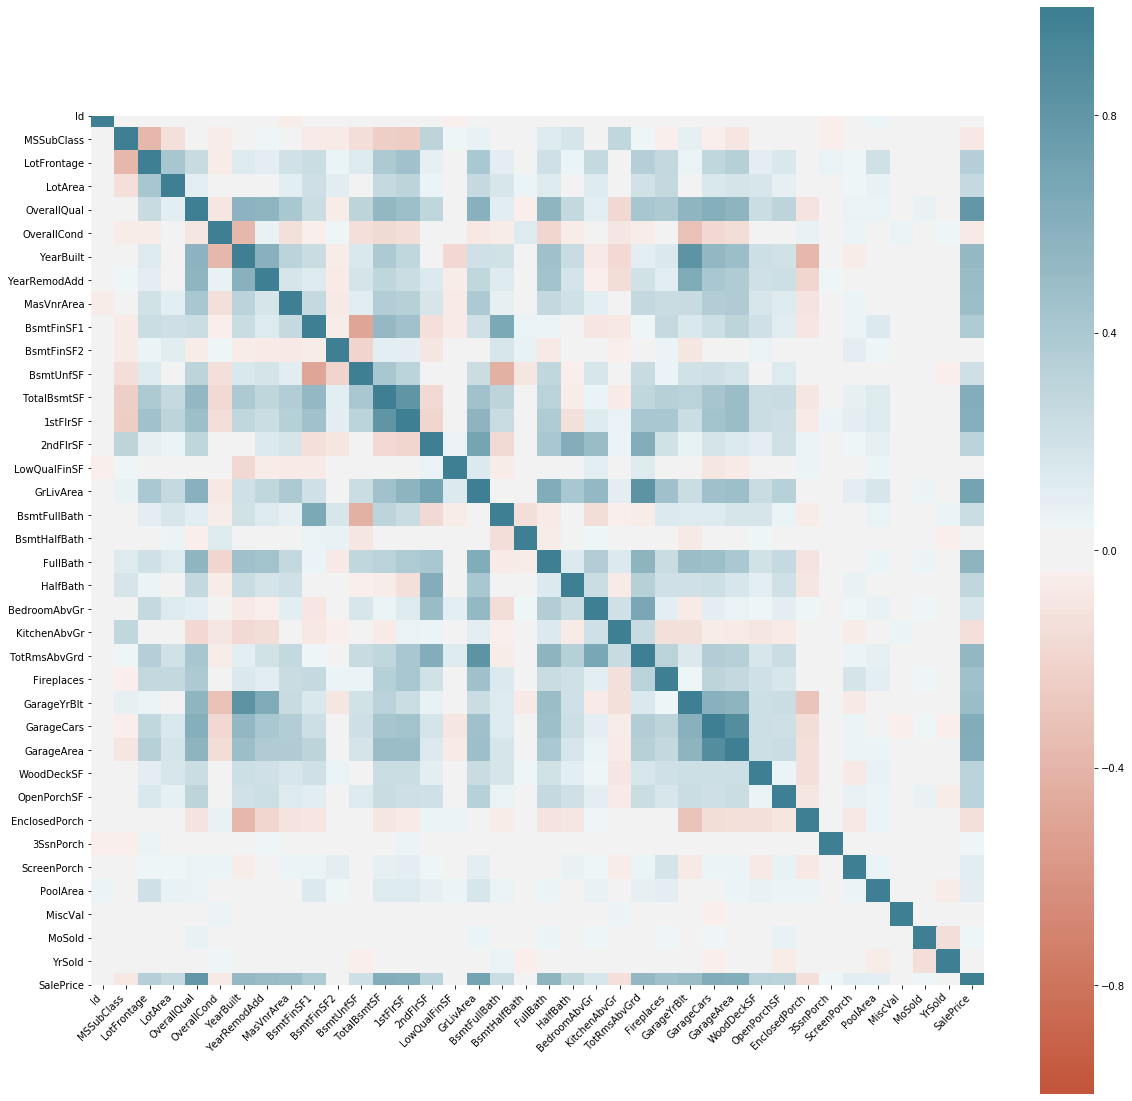

In [9]:
corr = train.corr()

plt.figure(figsize = (20,20))


ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
ax.get_figure().savefig("output.png")

In [11]:
corr = train.corr()
corr = corr['SalePrice']

In [53]:
corr.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [12]:
corr.sort_values(ascending=False).head(11)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [13]:
first_criteria = pd.DataFrame(corr.sort_values(ascending=False)).head(11).index.values[1:] # Top 10 most correlated features
first_criteria #to exclude Sale Price

array(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'], dtype=object)

In [14]:
X = train[first_criteria]
y = train['SalePrice']

# Simple Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [16]:
X = train[first_criteria]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Split train dataset into train and test

In [17]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[1.000000e+00, 7.000000e+00, 1.504000e+03, ..., 4.020025e+06,
        4.022030e+06, 4.024036e+06],
       [1.000000e+00, 6.000000e+00, 1.309000e+03, ..., 3.896676e+06,
        3.946026e+06, 3.996001e+06],
       [1.000000e+00, 6.000000e+00, 1.258000e+03, ..., 3.759721e+06,
        3.781050e+06, 3.802500e+06],
       ...,
       [1.000000e+00, 5.000000e+00, 8.640000e+02, ..., 3.822025e+06,
        3.890450e+06, 3.960100e+06],
       [1.000000e+00, 7.000000e+00, 1.426000e+03, ..., 3.678724e+06,
        3.832164e+06, 3.992004e+06],
       [1.000000e+00, 7.000000e+00, 1.555000e+03, ..., 4.028049e+06,
        4.028049e+06, 4.028049e+06]])

In [18]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(X_train_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [-3.44153523e-04  2.66141383e+04  4.55960073e+02  4.41037278e+05
 -2.72283055e+03 -1.18110357e+03  8.00868696e+02 -1.29892837e+05
 -1.82755219e+05  1.98416587e+04 -3.83339158e+04  3.97669401e+02
  1.09210174e+01  5.94530566e+03 -1.49273280e+01  1.85220915e+00
  1.45398692e+01 -2.93028202e+03 -1.21742450e+02 -4.14475498e+00
 -2.04494012e+01 -6.88814519e-03  5.18659637e+01 -9.15676016e-02
 -1.31640280e-02 -6.42444706e-02  2.52444707e+01  2.51322394e+00
  7.29991291e-02 -3.03233576e-01 -8.83400735e+03 -2.24920950e+01
 -2.29067006e+01  3.39267989e+01 -2.35559644e+03 -1.19942649e+04
 -1.46031883e+02 -7.41943237e+01  1.31608847e-01  7.31796200e-02
 -1.24411680e-01 -3.61850226e+01  3.81715274e+01  1.00780264e+00
  3.77809071e-01  2.40728477e-02 -4.74697775e-02 -1.60634935e+01
  8.54554606e+00  2.95746823e-01  3.20898749e-01  3.71010779e-02
  1.00446126e+01 -5.68864573e+00 -4.84145390e-01  6.98964265e-02
  9.38223673e+03 -2.31981481e+03  4.83927331e+01  9.42388177e+00
  1.402911

In [19]:
X_test_poly = poly.fit_transform(X_test)
test_y_ = clf.predict(X_test_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , y_test) )

Mean absolute error: 21330.68
Residual sum of squares (MSE): 1077236188.10
R2-score: 0.81


In [20]:
test[first_criteria] = test[first_criteria].fillna(0)

In [21]:
X_test_poly = poly.fit_transform(test[first_criteria])
test_y_ = clf.predict(X_test_poly)

In [22]:
sample_submission["Id"] = test["Id"]
sample_submission["SalePrice"] = test_y_

In [23]:
sample_submission.head()

,Id,SalePrice
0,1461,136394.694952
1,1462,156592.786799
2,1463,172154.803626
3,1464,178067.023187
4,1465,203204.630370


In [24]:
sample_submission.to_csv("sample_submission_1.csv",index=False)
# Result was Root Mean Squared Logarithmic Error of 0.17982 and placed 3940

# What happens when we log transform SalePrice

In [25]:
#applying log transformation
# y is train['SalePrice']
train['SalePrice'] = np.log(train['SalePrice'])

In [57]:
train.shape

(1460, 81)

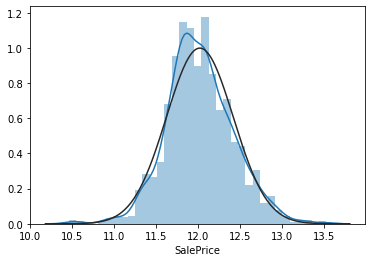

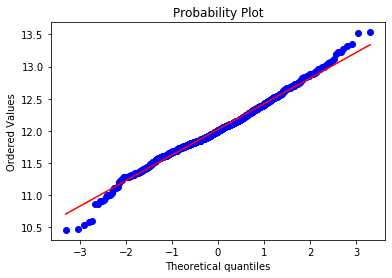

In [26]:
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [52]:
X = train[first_criteria]
#X = train_x
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 
# Split train dataset into train and test

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_train_poly

clf = linear_model.LinearRegression()
train_y_ = clf.fit(X_train_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

X_test_poly = poly.fit_transform(X_test)
test_y_ = clf.predict(X_test_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , y_test) )

Coefficients:  [-3.44153523e-04  2.66141383e+04  4.55960073e+02  4.41037278e+05
 -2.72283055e+03 -1.18110357e+03  8.00868696e+02 -1.29892837e+05
 -1.82755219e+05  1.98416587e+04 -3.83339158e+04  3.97669401e+02
  1.09210174e+01  5.94530566e+03 -1.49273280e+01  1.85220915e+00
  1.45398692e+01 -2.93028202e+03 -1.21742450e+02 -4.14475498e+00
 -2.04494012e+01 -6.88814519e-03  5.18659637e+01 -9.15676016e-02
 -1.31640280e-02 -6.42444706e-02  2.52444707e+01  2.51322394e+00
  7.29991291e-02 -3.03233576e-01 -8.83400735e+03 -2.24920950e+01
 -2.29067006e+01  3.39267989e+01 -2.35559644e+03 -1.19942649e+04
 -1.46031883e+02 -7.41943237e+01  1.31608847e-01  7.31796200e-02
 -1.24411680e-01 -3.61850226e+01  3.81715274e+01  1.00780264e+00
  3.77809071e-01  2.40728477e-02 -4.74697775e-02 -1.60634935e+01
  8.54554606e+00  2.95746823e-01  3.20898749e-01  3.71010779e-02
  1.00446126e+01 -5.68864573e+00 -4.84145390e-01  6.98964265e-02
  9.38223673e+03 -2.31981481e+03  4.83927331e+01  9.42388177e+00
  1.402911

In [28]:
X_test_poly = poly.fit_transform(test[first_criteria])
test_y_ = clf.predict(X_test_poly)

sample_submission["Id"] = test["Id"]
sample_submission["SalePrice"] = test_y_

sample_submission.head()

sample_submission.to_csv("sample_submission_2.csv",index = False)

# Result was Root Mean Squared Logarithmic Error of 9.45 which is way worse than the previous model
# We might make an overfitted model

## Using get_dummies function from pandas to convert categorical variables

In [29]:
train = pd.read_csv("houseprice_train.csv")
test = pd.read_csv("houseprice_test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [30]:
train_test = pd.concat([train,test],axis=0)

/Users/chunsopark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [31]:
y = train['SalePrice']
train_test = train_test.drop(['Id','SalePrice'],axis=1)

In [32]:
train_test.select_dtypes(include='object').head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
1,NaN,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,NaN,Veenker,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
2,NaN,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
3,NaN,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,NaN,Crawfor,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub
4,NaN,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,NoRidge,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub


In [33]:
train_test.select_dtypes(include=['float','int']).head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,5,7,0,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,8,6,0,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,5,7,0,0,6,920.0,0,2001,2002,2008
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,5,7,0,0,7,756.0,0,1915,1970,2006
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,5,8,0,0,9,1145.0,192,2000,2000,2008


In [34]:
train_test["MSSubClass"] = train_test["MSSubClass"].apply(lambda x: str(x))

#MSSubClass is not a numerical feature, it is a categorical variable. So we changed it from int to string type

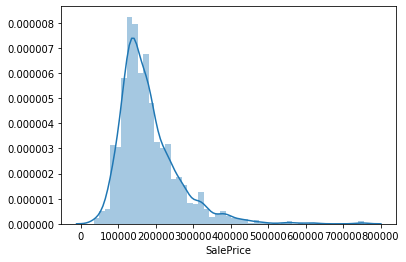

In [35]:
sns.distplot(train['SalePrice'])

#histogram tells the distribution of SalePrice column

In [36]:
miss_count = train_test.isnull().sum().sort_values(ascending=False)
miss_percent = (train_test.isnull().sum()/train_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([miss_count, miss_percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data["Total"] >= 1]

# If there are many missing date within the column, 
# it is better for our level to delete the column with many missing data.
# For now, We are going to delete all columns with a missing data for simplicity.

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageCond,159,0.054471


In [37]:
train_test = train_test.drop((missing_data[missing_data['Total'] >= 1]).index,axis = 1)

In [38]:
train_test.isnull().sum().sum()

#Now there is not missing value within the train data

0

In [39]:
train_test = pd.get_dummies(train_test)

In [55]:
len(train_test.columns)

164

In [40]:
train_test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,EnclosedPorch,Fireplaces,FullBath,GrLivArea,HalfBath,KitchenAbvGr,...,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Street_Grvl,Street_Pave
0,856,854,0,3,0,0,2,1710,1,1,...,0,0,0,0,0,0,1,0,0,1
1,1262,0,0,3,0,1,2,1262,0,1,...,0,0,0,0,0,0,1,0,0,1
2,920,866,0,3,0,1,2,1786,1,1,...,0,0,0,0,0,0,1,0,0,1
3,961,756,0,3,272,1,1,1717,0,1,...,0,0,1,0,0,0,0,0,0,1
4,1145,1053,0,4,0,1,2,2198,1,1,...,0,0,0,0,0,0,1,0,0,1


In [41]:
length_train = train.shape[0]
train_x = train_test[:length_train]
test_x = train_test[length_train:]
print(train_x.shape)
print(test_x.shape)

(1460, 164)
(1459, 164)


In [42]:
X = train_x

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
# Split train dataset into train and test

poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_train_poly

clf = linear_model.LinearRegression()
train_y_ = clf.fit(X_train_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

X_test_poly = poly.fit_transform(X_test)
test_y_ = clf.predict(X_test_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , y_test) )

Coefficients:  [ 1.86194557e-07  2.59023657e+01  1.77565169e+01  3.80579538e+01
 -7.66964774e+03  1.17179278e+01  4.10108777e+03 -3.81776089e+02
  4.53611524e+01  2.93376531e+03 -2.10561403e+04  7.94479642e-01
  1.70221308e+00 -3.20945686e+00 -7.61873705e+02  3.78317326e-01
  4.29165009e+03  1.09208695e+04 -6.85038465e+00  6.95145295e+01
  1.91569664e+03  1.95709800e+01  4.40438351e+02  6.78874596e+01
  5.08582519e+02  2.26814957e+04 -1.16966120e+04  7.52625880e+03
 -1.26807559e+04 -5.83038660e+03  4.73210872e+01 -4.73210872e+01
 -2.25603204e+03 -2.49169463e+02  6.82904323e+03 -1.77415386e+04
  7.00336050e+03 -1.55656741e+04  2.50211366e+03  8.00712163e+03
  1.14707751e+04  6.65706064e+04  3.03899730e+04  4.46549039e+04
 -1.80079951e-10 -1.42837636e+05 -3.50689742e+04  3.62911267e+04
 -5.45696821e-11  7.80915047e+03  6.24222042e+03  4.74019670e+03
 -2.61050522e+04  7.31348461e+03  2.97504793e+04  8.74191742e+03
 -1.91083825e+04 -1.93840142e+04  5.47294997e+03  5.71279984e+03
  1.104456

In [43]:
X_test_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(X_test_poly)

sample_submission["Id"] = test["Id"]
sample_submission["SalePrice"] = test_y_

sample_submission.head()

sample_submission.to_csv("sample_submission_3.csv",index = False)
# Result was Root Mean Squared Logarithmic Error of 0.22156 which is worse than the previous model

# Regression using top 16 features

In [58]:
train = pd.read_csv("houseprice_train.csv")
test = pd.read_csv("houseprice_test.csv")
sample_submission = pd.read_csv("sample_submission.csv")
corr = train.corr()
corr = corr['SalePrice']
fifth_criteria = pd.DataFrame(corr.sort_values(ascending=False)).head(17).index.values[1:] # Top 5 most correlated features

In [59]:
len(corr)

38

In [60]:
train[fifth_criteria].isna().sum()

OverallQual       0
GrLivArea         0
GarageCars        0
GarageArea        0
TotalBsmtSF       0
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
GarageYrBlt      81
MasVnrArea        8
Fireplaces        0
BsmtFinSF1        0
LotFrontage     259
WoodDeckSF        0
dtype: int64

In [61]:
b = np.array(["GarageYrBlt","LotFrontage"])
fifth_criteria = np.setdiff1d(fifth_criteria,b)
train[fifth_criteria] = train[fifth_criteria].fillna(train.mean())

In [62]:
fifth_criteria

array(['1stFlrSF', 'BsmtFinSF1', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GrLivArea', 'MasVnrArea', 'OverallQual',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd'], dtype=object)

In [48]:
X = train[fifth_criteria]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # Split train dataset into train and test

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_train_poly

clf = linear_model.LinearRegression()
train_y_ = clf.fit(X_train_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

X_test_poly = poly.fit_transform(X_test)
test_y_ = clf.predict(X_test_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , y_test) )

Coefficients:  [ 1.43921885e-03  4.44464683e+02 -2.33085016e+02  1.90569363e+04
 -4.95557043e+05 -2.51949848e+03  3.69225766e+05  2.22140291e+02
  8.99174121e+02 -5.67482846e+04 -9.54302211e+04 -8.18705057e+02
 -6.31513843e+02  1.25634359e+04 -6.38357536e+04  2.03094928e-02
 -9.41692655e-03  1.70485710e+01  3.01438004e+00 -1.11416455e-01
  3.50280895e+01 -4.92800876e-02 -6.67020495e-02  1.12879860e+01
 -1.54568623e+00 -3.85274588e-02  2.32004248e-02 -4.90688713e-02
 -1.86584195e-01 -1.74312657e-03  6.00026619e+00  3.73386209e+00
  9.44771980e-03 -2.72932354e+00 -6.58301212e-03 -3.37294232e-03
  4.11824276e+00 -3.39567669e+00  2.57953122e-03 -8.67952898e-04
  2.74976096e-01 -1.40402140e-01 -6.29257931e+03 -5.96197664e+03
 -1.40683682e+01  2.17336490e+03  3.31670128e+01  1.46150192e+01
 -9.64793516e+02 -5.26565539e+03 -1.28225983e+00 -1.43516254e+01
 -1.13554400e+02  1.02534047e+02  6.26262157e+03 -2.55060598e+01
 -3.41800256e+03  2.44842556e+01  3.49317550e+01 -3.74664774e+03
 -2.695886

In [49]:
test[fifth_criteria].isna().sum()

1stFlrSF         0
BsmtFinSF1       1
Fireplaces       0
FullBath         0
GarageArea       1
GarageCars       1
GrLivArea        0
MasVnrArea      15
OverallQual      0
TotRmsAbvGrd     0
TotalBsmtSF      1
WoodDeckSF       0
YearBuilt        0
YearRemodAdd     0
dtype: int64

In [50]:
test[fifth_criteria] = test[fifth_criteria].fillna(test.mean())

X_test_poly = poly.fit_transform(test[fifth_criteria])
test_y_ = clf.predict(X_test_poly)

test_y_

sample_submission["Id"] = test["Id"]
sample_submission["SalePrice"] = test_y_

sample_submission.head()

sample_submission.to_csv("sample_submission_4.csv",index = False)
# Result was Root Mean Squared Logarithmic Error of 0.17284 which is the Second best option so far